# MTH5001 Introduction to Computer Programming - Lab 8
Dr Lucas Lacasa and Prof. Thomas Prellberg

## Exercises

While you have seen that `scipy.linalg.solve()` can easily solve systems of linear equations, it is really a black box. In these exercises, we will slowly build up Python Code to enable us to do [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination). Having set the Linear Algebra exam in January, you should remember this well. For the coding, we will in particular need the use of the [elementary matrices](https://en.wikipedia.org/wiki/Elementary_matrix#Elementary_row_operations).

In [1]:
import numpy as np
import scipy.linalg as la

### Exercise 1: Implementing Elementary Row Operations

We need to code some elementary operations for matrices. Lets write some code that enables us to
1. add $k$ times row $j$ to row $i$
2. multiply row $i$ by scalar $s$
3. switch rows $i$ and $j$

Each of these elementary row operations can be coded as a matrix multiplication by an [elementary matrix](https://en.wikipedia.org/wiki/Elementary_matrix#Elementary_row_operations).

For example, if $A$ is a $3\times3$ matrix and we want to add twice row 2 to row 0, then the elementary matrix for this is
$$E=\left[\begin{matrix}
1&0&2\\ 0&1&0\\ 0&0&1
\end{matrix}\right]$$
Lets verify this for the matrix
$$A=\left[\begin{matrix}
1&1&2\\ -1&3&1\\ 0&5&2
\end{matrix}\right]$$

In [2]:
A=np.array([[1,1,2],[-1,3,1],[0,5,2]])
print(A)
print()
E=np.array([[1,0,2],[0,1,0],[0,0,1]])
print(E)
print()
print(E@A)

[[ 1  1  2]
 [-1  3  1]
 [ 0  5  2]]

[[1 0 2]
 [0 1 0]
 [0 0 1]]

[[ 1 11  6]
 [-1  3  1]
 [ 0  5  2]]


To multiply row 1 by $-3$ is done by
$$E=\left[\begin{matrix}
1&0&0\\ 0&-3&0\\ 0&0&0
\end{matrix}\right]$$

In [3]:
A=np.array([[1,1,2],[-1,3,1],[0,5,2]])
print(A)
print()
E=np.array([[1,0,0],[0,-3,0],[0,0,1]])
print(E)
print()
print(E@A)

[[ 1  1  2]
 [-1  3  1]
 [ 0  5  2]]

[[ 1  0  0]
 [ 0 -3  0]
 [ 0  0  1]]

[[ 1  1  2]
 [ 3 -9 -3]
 [ 0  5  2]]


And to switch row 1 and row 2 is done with
$$E=\left[\begin{matrix}
1&0&0\\ 0&0&1\\ 0&1&0
\end{matrix}\right]$$

In [4]:
A=np.array([[1,1,2],[-1,3,1],[0,5,2]])
print(A)
print()
E=np.array([[1,0,0],[0,0,1],[0,1,0]])
print(E)
print()
print(E@A)

[[ 1  1  2]
 [-1  3  1]
 [ 0  5  2]]

[[1 0 0]
 [0 0 1]
 [0 1 0]]

[[ 1  1  2]
 [ 0  5  2]
 [-1  3  1]]


Make sure you understand how the matrices $E$ are determined. In exercises 1.a, 1.b, and 1.c, you should write the appropriate $E$ and compute your answer by multiplying $E$ with the matrix.

#### Exercise 1.a.: Write a function `add_row(A,s,i,j)` that takes as input parameters a numpy array representing the matrix $A$, a number $s$,  and integers $i$ and $j$ and returns the numpy array resulting from adding $s$ times row $j$ to row $i$.

You do not need to check whether the indices $i$ and $j$ are valid, but you should make sure that you get the correct output for $i=j$.

For example, adding double the second row to the first row of
$$A=\left[\begin{matrix}
2&1\\ 3&4
\end{matrix}\right]$$
gives
$$A=\left[\begin{matrix}
8&9\\ 3&4
\end{matrix}\right]$$

#### Exercise 1.b.: Write a function `scale_row(A,s,i)` that takes as input parameters a numpy array representing the matrix $A$, a number $s$,  and an integers $i$ and returns the numpy array resulting from multiplying $s$ row $i$ by $s$.

You do not need to check whether the indices $i$ and $j$ are valid.

For example, multiplying the second row by $-0.5$ for
$$A=\left[\begin{matrix}
2&1\\ 3&4
\end{matrix}\right]$$
gives
$$A=\left[\begin{matrix}
2&1\\ -1.5&-2
\end{matrix}\right]$$

#### Exercise 1.c.: Write a function `switch_rows(A,i,j)` that takes as input parameters a numpy array representing the matrix $A$,  integers $i$ and $j$, and returns the numpy array resulting from switching rows $i$ and $j$.

You do not need to check whether the indices $i$ and $j$ are valid, but you should make sure that you get the correct output for $i=j$.

For example, switching the first and second rows of 
$$A=\left[\begin{matrix}
2&1\\ 3&4
\end{matrix}\right]$$
gives
$$A=\left[\begin{matrix}
3&4\\ 2&1
\end{matrix}\right]$$

### Exercise 2.: Compute an inverse matrix using elementary row operations.

You should be able to recall how to compute an inverse matrix using elementary row operations. First do it by hand using the three functions defined above.

To get you started, I'll show you how to augment matrix $A$ by another matrix $M$. This is called stacking, and we didn't cover it in the lecture. To combine two arrays horizontally, you can use `numpy.hstack(A,M)` as follows.

In [5]:
A=np.array([[1,1,2],[-1,-1,1],[0,5,2]])
print(A)
print()
M=np.eye(3)
print(M)
print()
AM=np.hstack([A,M])
print(AM)

[[ 1  1  2]
 [-1 -1  1]
 [ 0  5  2]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

[[ 1.  1.  2.  1.  0.  0.]
 [-1. -1.  1.  0.  1.  0.]
 [ 0.  5.  2.  0.  0.  1.]]


I'll show you the steps.

In [ ]:
AM=add_row(AM,1,1,0)
print(AM)

In [ ]:
AM=switch_rows(AM,1,2)
print(AM)

In [ ]:
AM=scale_row(AM,1/5,1)
print(AM)

In [ ]:
AM=scale_row(AM,1/3,2)
print(AM)

Now the matrix on the left-hand side is in upper triangular form.

#### Exercise 2.a.: Continue this process until the left-hand side is an identity matrix.

#### Exercise 2.b.: Assign the right-hand side matrix to a variable called $M$. Check whether the resulting matrix is the inverse by multiplying $M$ with the original matrix $A$.

### Exercise 3: Compute the inverse of a Matrix $A$.

The above manual procedure can be written as an algorithm. I will give you the algorithm and then leave it up to you to turn this into workable Python code. We shall assume that the matrix $A$ is invertible, so we don't need to test for the cases when our algorithm would fail.

Note that the algorithm is deliberately kept a bit chatty. This is to train you practice how to teach the computer to do the right steps.

1. Construct the augmented matrix.
1. Construct the row echelon form: for each row (indexed by $i$): 
    1. Check if $a_{ii}$ is zero. If it is, find row $j$ below for which $a_{ji}$ is non-zero and switch rows $i$ and $j$ (you can use `switch_rows()`).
    1. Scale row $i$ such that $a_{ii}$ becomes one (you can use `scale_row()`).
    1. Add multiples of row $i$ to all rows below so that $a_{ji}$ becomes zero (you can use `add_row()`).
1. Create zeros above the diagonal: for each row (indexed by $i$):
    1. Add multiples of row $i$ to all rows above so that $a_{ji}$ becomes zero (you can use `add_row()`).
1. Return the second half of the augmented matrix.

Note that this is not the best algorithm. The built-in routines in numpy have matrix inversions that are much more efficient and numerically stable.


#### Exercise 3.a.: Write a function `inverse_matrix(A)` that computes the inverse of a matrix $A$ using Gauss elimination.

You may assume that the matrix is invertible.

### Exercise 4.: Compare the spectra of "random" matrices.

Consider a large real-valued matrix with entries randomly chosen from a normal distribution. What can we say about the spectrum of this matrix?

In [6]:
N=1000
A=np.random.normal(size=(N,N))
evals=la.eig(A)[0]
#print(evals)

Python can easily compute a list of all complex eigenvalues. But can we visualise this?

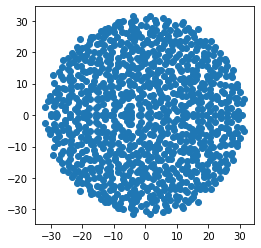

In [7]:
import matplotlib.pyplot as plt 
x=np.real(evals)
y=np.imag(evals)
plt.scatter(x,y)
plt.axis('scaled')
plt.show()

It looks like the eigenvalues are distributed fairly uniformly inside a disk.

On the other hand, if the matrix is symmetric ($B=B^T$), the eigenvalues are all real.

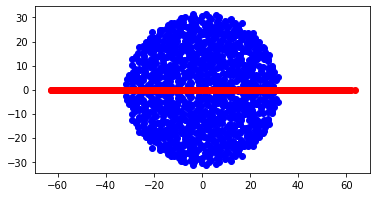

In [8]:
B=np.random.normal(size=(N,N))
for i in range(N):
    for j in range(i+1,N):
        B[i,j]=B[j,i]
evals2=la.eig(B)[0]
#print(evals2)
x2=np.real(evals2)
y2=np.imag(evals2)
plt.scatter(x,y,color='blue')
plt.scatter(x2,y2,color='red')
plt.axis('scaled')
plt.show()

And as we saw in the lecture, the eigenvalue distribution along the real line could be computed using a histogram.

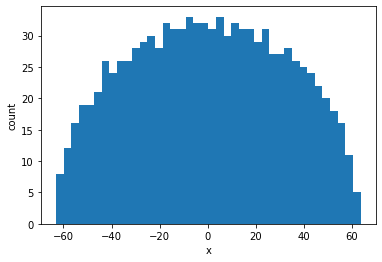

In [9]:
plt.hist(np.real(evals2), bins=40);
plt.xlabel('x')
plt.ylabel('count')
#plt.axis('scaled')
plt.show()

You will now look at some other cases.

#### Exercise 4.a.: Plot the spectrum of a random skew-symmetric matrix ($C=-C^T$) on the same graph as the spectrum of a random symmetric matrix ($B=B^T$) and a random matrix $A$ without symmetry. Describe what you see.

#### Exercise 4.b.: Draw the spectrum of $(A+B)$ and $A+C$. Describe what you see.

#### Exercise 4.c.: Investigate the spectrum of $A A^T$ for a random matrix $A$ without symmetry. Describe what you see.

## Submit your Jupyter Notebook to QMPLUS

Once you are done, save the jupyter notebook and submit it to QMPLUS under Lab Report Week 4.